In [26]:
import matplotlib.pyplot as plt
import numpy as np

from torch import utils
from torchvision import transforms as T
from torchvision import utils as U
from torchvision import datasets
from torchvision import io
from torchvision.utils import save_image
import torch
from PIL import Image

from os import listdir
from pathlib import Path

In [2]:
random_auto2_transform = T.AutoAugment( 
                            T.AutoAugmentPolicy.IMAGENET )

In [27]:
dataset_path = Path("../data/datasets/Labels_pooling_LR_dataset_augmented")
dataset_path

PosixPath('../data/datasets/Labels_pooling_LR_dataset_augmented')

In [24]:
labels = listdir(f"{dataset_path}/train")
labels

['C-shape',
 'Contracted',
 'Wildtype',
 'Screw-like',
 'Bridge-like',
 'Snake-like']

In [44]:
# enlever la bande de metadata en haut
for x in ['train', 'val']:
    for l in labels:
        for img_name in listdir(Path(dataset_path,x,l)):
            img_path = Path(dataset_path,x,l,img_name)
            img = plt.imread(img_path)[10:,:,:]
            #print(img.size)
            plt.imsave(img_path, img)

In [42]:
test = 'test.jpg'
test[:-4]

'test'

In [45]:
for l in labels:
    for img_name in listdir(Path(dataset_path,'train',l)):
        img_path = Path(dataset_path,'train',l,img_name)
        img = io.read_image(str(img_path))
        
        for i in range(1, 10):
            i_name = f"{img_name[:-4]}_{i}.jpg"
            new_image = random_auto2_transform(img.type(dtype=torch.uint8))
            
            io.write_jpeg(new_image, str(Path(dataset_path,'train',l,i_name)))

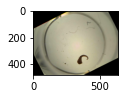

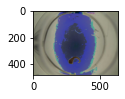

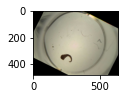

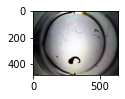

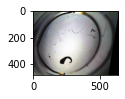

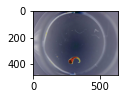

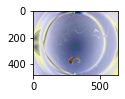

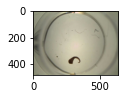

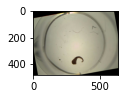

In [7]:
for i in range(1, 10): 
    new_image = random_auto2_transform(img.type(dtype=torch.uint8))

    plt.subplot(3, 3, i)
    plt.imshow(np.moveaxis(new_image.detach().numpy(), 0, 2)) 
    plt.show()

In [21]:
path = "test.jpg"
path[:-4]

'test'

In [27]:
for label in labels:
    images = listdir(f"{dataset_path}/train/{label}")
    for img_name in images :
        img = io.read_image(f"{dataset_path}/train/{label}/{img_name}")
        for i in range(1, 10) : 
            new_image = random_auto2_transform(img)
            save_image(new_image, img_name[:-4]+str(i)+'.jpg')


RuntimeError: result type Float can't be cast to the desired output type Byte